## IImport libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch
cuda = torch.cuda.is_available()

try:
    from plotting_CIFAR10 import plot_autoencoder_stats
except Exception as ex:
    print(f"If using Colab, you may need to upload `plotting.py`. \
          \nIn the left pannel, click `Files > upload to session storage` and select the file `plotting.py` from your computer \
          \n---------------------------------------------")
    print(ex)

In [2]:
def add_noise_and_clip_data(data):
    noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
    data = data + noise
    data = np.clip(data, -1., 1.)
    return data

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ]
)

# Load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

## USE CODE BELOW IF YOUR COMPUTER IS TOO SLOW
reduce_dataset = False
if reduce_dataset:
    used_categories = (3, 5) # cats and dogs

    classes = [classes[i] for i in used_categories]
    new_train_data = []
    new_train_labels = []

    new_test_data = []
    new_test_labels = []
    for i, t in enumerate(used_categories):
        new_train_data.append(trainset.data[np.where(np.array(trainset.targets) == t)])
        new_train_labels += [i for _ in range(new_train_data[-1].shape[0])]

        new_test_data.append(testset.data[np.where(np.array(testset.targets) == t)])
        new_test_labels += [i for _ in range(new_test_data[-1].shape[0])]

    new_train_data = np.concatenate(new_train_data, 0)
    trainset.data = new_train_data
    trainset.targets = new_train_labels

    new_test_data = np.concatenate(new_test_data, 0)
    testset.data = new_test_data
    testset.targets = new_test_labels

# Batch size is set to 64 
batch_size = 64

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)
print('used classes:', classes)

Files already downloaded and verified
Files already downloaded and verified
used classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [4]:
import copy
print(len(trainset.data))

# Gaussian nois
add_noise = True
def add_noise_and_clip_data(data):
    noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
    data = data + noise
    data = np.clip(data, 0., 1.)
    return data

if (add_noise):
    Noisy_trainloader = copy.deepcopy(trainloader)
    for x,y in Noisy_trainloader:
        for i in range(len(x)):
            x[i][:][:][:] = add_noise_and_clip_data(x[i][:][:][:])

50000


In [5]:
Noisy_trainloader_iter = iter(Noisy_trainloader)

In [6]:
x,y = train_data_iter.next()
print(len(x))
x1,y1 = Noisy_trainloader_iter.next()
print(x[0][:][:][:])
print(x1[0][:][:][:])

64
tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ...,

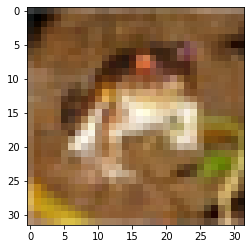

In [7]:
img = x[0][:][:][:]
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

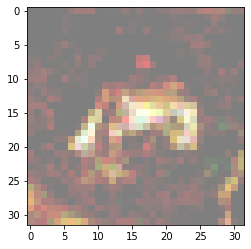

In [8]:
img1 = add_noise_and_clip_data(x1[0][:][:][:])
img1 = img1 / 2 + 0.5 # unnormalize
npimg1 = img1.numpy()
plt.imshow(np.transpose(npimg1, (1, 2, 0)))

In [9]:
x2,y2 = train_data_iter.next()
x3,y3 = Noisy_trainloader_iter.next()

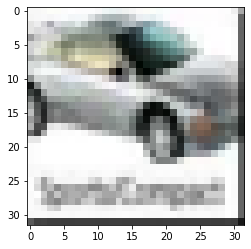

In [14]:
img = x2[15][:][:][:]
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

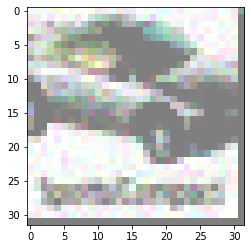

In [15]:
img3 = add_noise_and_clip_data(x3[15][:][:][:])
img3 = img3 / 2 + 0.5 # unnormalize
npimg3 = img3.numpy()
plt.imshow(np.transpose(npimg3, (1, 2, 0)))

tensor([[[[-0.8039, -0.7490, -0.6471,  ...,  0.5294,  0.5529,  0.6863],
          [-0.8196, -0.7569, -0.6549,  ...,  0.5451,  0.5765,  0.7020],
          [-0.8196, -0.7647, -0.6549,  ...,  0.5373,  0.5765,  0.6784],
          ...,
          [-0.4667, -0.4039, -0.3412,  ...,  0.2000,  0.1216, -0.0118],
          [-0.4431, -0.3882, -0.3255,  ...,  0.2549,  0.1608,  0.0353],
          [-0.4431, -0.4039, -0.3490,  ...,  0.2157,  0.1216,  0.0275]],

         [[-0.7725, -0.6706, -0.5216,  ...,  0.3569,  0.4980,  0.7255],
          [-0.7725, -0.6706, -0.5216,  ...,  0.3882,  0.5451,  0.7569],
          [-0.7725, -0.6941, -0.5451,  ...,  0.4039,  0.5765,  0.7569],
          ...,
          [-0.4745, -0.4275, -0.3804,  ...,  0.0745, -0.0039, -0.1137],
          [-0.4510, -0.4118, -0.3647,  ...,  0.1137,  0.0353, -0.0667],
          [-0.4510, -0.4196, -0.3804,  ...,  0.0745,  0.0039, -0.0667]],

         [[-0.6235, -0.5529, -0.4275,  ..., -0.0275,  0.3255,  0.7490],
          [-0.6314, -0.5608, -

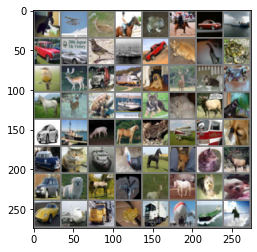

In [12]:
def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
images, labels = Noisy_trainloader_iter.next()

print(images)

# show images
imshow(torchvision.utils.make_grid(images))
#print(images)

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

tensor([[[[ 0.6078,  0.5294,  0.5294,  ...,  0.5373,  0.5294,  0.5843],
          [ 0.6235,  0.5529,  0.5608,  ...,  0.5765,  0.5608,  0.6078],
          [ 0.6078,  0.5294,  0.5294,  ...,  0.5529,  0.5451,  0.5922],
          ...,
          [-0.0431, -0.0196,  0.0275,  ..., -0.4510, -0.5373, -0.5608],
          [-0.1216, -0.0667, -0.0353,  ..., -0.4431, -0.5608, -0.6235],
          [-0.1843, -0.1451, -0.1137,  ..., -0.4588, -0.5608, -0.6235]],

         [[ 0.7255,  0.6941,  0.6941,  ...,  0.7020,  0.7020,  0.7333],
          [ 0.7569,  0.7333,  0.7333,  ...,  0.7412,  0.7412,  0.7647],
          [ 0.7569,  0.7255,  0.7255,  ...,  0.7255,  0.7176,  0.7490],
          ...,
          [-0.0118,  0.0118,  0.0667,  ..., -0.4039, -0.4980, -0.5216],
          [-0.1059, -0.0510, -0.0118,  ..., -0.3961, -0.5137, -0.5843],
          [-0.1765, -0.1451, -0.1059,  ..., -0.4118, -0.5216, -0.5843]],

         [[ 0.7882,  0.7647,  0.7804,  ...,  0.7882,  0.8118,  0.8431],
          [ 0.8196,  0.8039,  

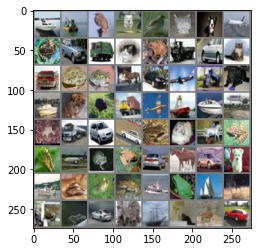

In [13]:
# get some random training images
images, labels = Noisy_trainloader_iter.next()

print(images)

# show images
imshow(torchvision.utils.make_grid(images))
#print(images)

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
def add_noise_and_clip_data(data):
    noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
    data = data + noise
    data = np.clip(data, -1., 1.)
    return data

157
10000
64
torch.Size([64, 3, 32, 32])


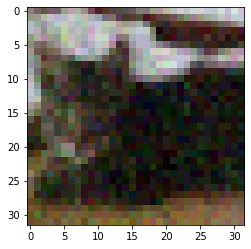

In [6]:
print(len(trainloader))
print(len(trainset))
x,y = next(iter(trainloader))
print(len(x))
print(x.shape)
y = x
y[0][:][:][:] = add_noise_and_clip_data(y[0][:][:][:])
img = x[0][:][:][:]
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

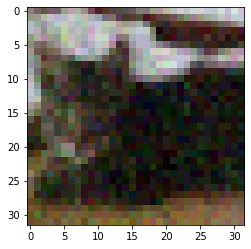

In [7]:
img = y[0][:][:][:]
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

tensor(-0.9137)
tensor(-1., dtype=torch.float64)


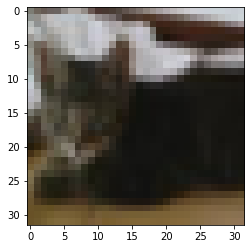

In [26]:
x,y = next(iter(trainloader))


#print(x[0][:][:][:])
#print(x[0][:][:][:].shape)
#print(np.transpose(x[0][:][:][:], (1, 2, 0)))
img = x[0][:][:][:]
print(torch.min(torch.min(img)))
M = x[0][:][:][:]
M = add_noise_and_clip_data(M)
print(torch.min(torch.min(M)))
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
#print(np.transpose(npimg, (1, 2, 0)))

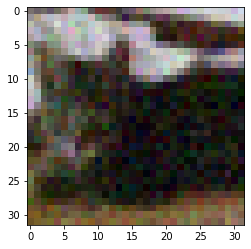

In [27]:
M = M / 2 + 0.5 # unnormalize
npimg = M.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
#print(np.transpose(npimg, (1, 2, 0)))

In [20]:
print(trainset.data[0])
print(torch.from_numpy(trainset.data[0]))

[[[125 125 116]
  [110 101  91]
  [102  90  83]
  ...
  [202 207 214]
  [200 205 212]
  [202 208 214]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  ...
  [195 201 205]
  [198 205 209]
  [204 211 215]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  ...
  [122 111 113]
  [139 128 131]
  [158 147 150]]

 ...

 [[104  82  41]
  [101  80  39]
  [101  81  38]
  ...
  [126 103  67]
  [126 103  69]
  [125 101  68]]

 [[104  81  40]
  [105  84  41]
  [109  88  43]
  ...
  [138 113  78]
  [137 113  80]
  [137 112  81]]

 [[105  83  42]
  [108  87  45]
  [115  94  50]
  ...
  [143 117  82]
  [143 116  84]
  [144 116  86]]]
tensor([[[125, 125, 116],
         [110, 101,  91],
         [102,  90,  83],
         ...,
         [202, 207, 214],
         [200, 205, 212],
         [202, 208, 214]],

        [[142, 146, 142],
         [146, 144, 139],
         [176, 172, 170],
         ...,
         [195, 201, 205],
         [198, 205, 209],
         [204, 211, 215]],

        [[180, 185, 183],


(10000, 32, 32, 3)
trainset.data[0]
[[[125 125 116]
  [110 101  91]
  [102  90  83]
  ...
  [202 207 214]
  [200 205 212]
  [202 208 214]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  ...
  [195 201 205]
  [198 205 209]
  [204 211 215]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  ...
  [122 111 113]
  [139 128 131]
  [158 147 150]]

 ...

 [[104  82  41]
  [101  80  39]
  [101  81  38]
  ...
  [126 103  67]
  [126 103  69]
  [125 101  68]]

 [[104  81  40]
  [105  84  41]
  [109  88  43]
  ...
  [138 113  78]
  [137 113  80]
  [137 112  81]]

 [[105  83  42]
  [108  87  45]
  [115  94  50]
  ...
  [143 117  82]
  [143 116  84]
  [144 116  86]]]
<class 'numpy.ndarray'>
(32, 32, 3)
tensor([[[-0.0745, -0.0824, -0.2392,  ..., -0.8196, -0.7333, -0.7176],
         [ 0.1529,  0.0902, -0.0588,  ..., -0.7961, -0.6706, -0.5608],
         [ 0.1843,  0.1529,  0.1216,  ..., -0.8039, -0.6471, -0.3647],
         ...,
         [-0.5686, -0.6000, -0.5529,  ..., -0.6863, -0.6157, -0.5765],


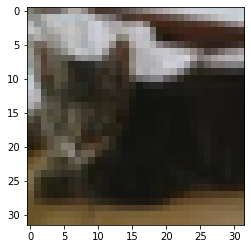

In [17]:
print(trainset.data.shape)
print("trainset.data[0]")
print(trainset.data[0])
print(type(trainset.data[0]))
print(trainset.data[0].shape)
plt.imshow(trainset.data[0])
images, labels = train_data_iter.next()
#print(images)
x, y = next(iter(trainloader))
#print("x")
#print(x)
#plt.imshow(x[1][:][:][:])
print(x[1][:][:][:])
print(x[1][:][:][:].shape)
print(type(x[1][:][:][:]))

In [3]:
print("# Training data")
print("Number of points:", len(trainset))
x, y = next(iter(trainloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(trainset.targets)))


print("\n# Test data")
print("Number of points:", len(testset))
x, y = next(iter(testloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(testset.targets)))

# Training data
Number of points: 10000
Batch dimension [B x C x H x W]: torch.Size([64, 3, 32, 32])
Number of distinct labels: 2

# Test data
Number of points: 2000
Batch dimension [B x C x H x W]: torch.Size([64, 3, 32, 32])
Number of distinct labels: 2


tensor([[[[ 0.0196,  0.0353,  0.0667,  ...,  0.2627,  0.2471,  0.2157],
          [ 0.0353,  0.0510,  0.0745,  ...,  0.2863,  0.2706,  0.2392],
          [ 0.0353,  0.0353,  0.0588,  ...,  0.2863,  0.2706,  0.2471],
          ...,
          [-0.0275, -0.0431, -0.1373,  ..., -0.6314, -0.6314, -0.7490],
          [-0.0353, -0.0588, -0.1686,  ..., -0.5686, -0.6706, -0.7961],
          [-0.0667, -0.1059, -0.2078,  ..., -0.6000, -0.7255, -0.8353]],

         [[-0.2471, -0.2235, -0.1922,  ...,  0.1686,  0.1529,  0.1294],
          [-0.2314, -0.2078, -0.1922,  ...,  0.2000,  0.1843,  0.1608],
          [-0.2314, -0.2235, -0.2078,  ...,  0.2000,  0.1843,  0.1686],
          ...,
          [-0.2471, -0.2863, -0.3647,  ..., -0.6235, -0.6235, -0.7569],
          [-0.2627, -0.3098, -0.3961,  ..., -0.5608, -0.6706, -0.8039],
          [-0.2941, -0.3490, -0.4353,  ..., -0.5922, -0.7255, -0.8431]],

         [[-0.5922, -0.6078, -0.5686,  ..., -0.2784, -0.3176, -0.3412],
          [-0.5843, -0.6000, -

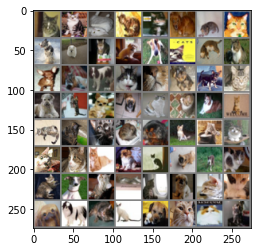

In [12]:
# Run this cell multiple time to see more samples

def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
images, labels = train_data_iter.next()

print(images)

# show images
imshow(torchvision.utils.make_grid(images))
#print(images)

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

## Network Structure

In [6]:
# Image dimensions
channels = x.shape[1]
height = x.shape[2]
width = x.shape[3]
num_features = (height * width) * channels

def compute_conv_dim(dim_size,kernel_size,padding_size,stride_size):
    return int((dim_size - kernel_size + 2 * padding_size) / stride_size + 1)

# First convolution layer
num_filters_conv1 = 16
kernel_size_conv1 = 5 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]
padding_conv1 = 2
input_dim = 32

# Second convolution layer
num_filters_conv2 = 5
kernel_size_conv2 = 5
stride_conv2 = 1
padding_conv2 = 1

# Convolutional layers
filters = [32,64,128,256,256]
kernels = [3,3,3,3,3]
padding = [1,1,1,1,1]
strides = [2,2,2,2,1]

# Hidden nodes in linear layers in Encoder
h1e = 2000
h2e = 1875

# Hidden nodes in linear layers in Decoder 
h1d = 2352
h2d = 1000

class AutoEncoder(nn.Module):
    def __init__(self, latent_features=2):
        super(AutoEncoder, self).__init__()
        # We typically employ an "hourglass" structure
        # meaning that the decoder should be an encoder
        # in reverse.
        
        ###########################
        #       Encoder           #
        ###########################
        # First convolutional layer
        self.conv_1 = Conv2d(in_channels=channels, 
                      out_channels=filters[0],
                      kernel_size=kernels[0], 
                      stride=strides[0],
                      padding=padding[0]) 
        self.conv1_height = compute_conv_dim(height,kernels[0],padding[0],strides[0])
        self.conv1_width = compute_conv_dim(width,kernels[0],padding[0],strides[0])
        
        self.norm1 = nn.BatchNorm2d(32)
        
        # Second convolutional layer
        self.conv_2 = Conv2d(in_channels=filters[0],
                            out_channels=filters[1],
                            kernel_size=kernels[1],
                            stride=strides[1],
                            padding=padding[1]) 
        self.conv2_height = compute_conv_dim(self.conv1_height,kernels[1],padding[1],strides[1])
        self.conv2_width = compute_conv_dim(self.conv1_width,kernels[1],padding[1],strides[1])
        
        self.norm2 = nn.BatchNorm2d(64)
        
        # Third convolutional layer
        self.conv_3 = Conv2d(in_channels=filters[1],
                            out_channels=filters[2],
                            kernel_size=kernels[2],
                            stride=strides[2],
                            padding=padding[2]) 
        self.conv3_height = compute_conv_dim(self.conv2_height,kernels[2],padding[2],strides[2])
        self.conv3_width = compute_conv_dim(self.conv2_width,kernels[2],padding[2],strides[2])
        
        self.norm3 = nn.BatchNorm2d(128)
        
        # Fourth convolutional layer
        self.conv_4 = Conv2d(in_channels=filters[2],
                            out_channels=filters[3],
                            kernel_size=kernels[3],
                            stride=strides[3],
                            padding=padding[3]) 
        self.conv4_height = compute_conv_dim(self.conv3_height,kernels[3],padding[3],strides[3])
        self.conv4_width = compute_conv_dim(self.conv3_width,kernels[3],padding[3],strides[3])
        
        self.norm4 = nn.BatchNorm2d(256)
        
        # Fifth convolutional layer 
        self.conv_5 = Conv2d(in_channels=filters[3],
                            out_channels=filters[4],
                            kernel_size=kernels[4],
                            stride=strides[4],
                            padding=padding[4])
        self.conv5_height = compute_conv_dim(self.conv4_height,kernels[4],padding[4],strides[4])
        self.conv5_width = compute_conv_dim(self.conv4_width,kernels[4],padding[4],strides[4])
        
        self.norm5 = nn.BatchNorm2d(256)
        
        ###########################
        #       Decoder           #
        ###########################
        self.conv_1_transpose = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                            kernel_size=3,
                            stride=2,
                            padding=1, output_padding=1)
        
        self.denorm1 = BatchNorm2d(256)
        
        self.conv_2_transpose = nn.ConvTranspose2d(in_channels=256+128, out_channels=128,
                            kernel_size=3,
                            stride=2,
                            padding=1, output_padding=1)
        
        self.denorm2 = BatchNorm2d(128)
        
        self.conv_3_transpose = nn.ConvTranspose2d(in_channels=128+64, out_channels=64,
                            kernel_size=3,
                            stride=2,
                            padding=1, output_padding=1)
        
        self.denorm3 = BatchNorm2d(64)
        
        self.conv_4_transpose = nn.ConvTranspose2d(in_channels=64+32, out_channels=32,
                            kernel_size=3,
                            stride=2,
                            padding=1, output_padding=1)
        self.denorm4 = BatchNorm2d(32)
        
        self.conv_5_transpose = nn.ConvTranspose2d(in_channels=32, out_channels=3,
                            kernel_size=3,
                            stride=1,
                            padding=1, output_padding=0)
        
        self.denorm5 = BatchNorm2d(3)

        # Decoder
        #self.decoder = nn.Sequential(
        #    nn.Linear(in_features=latent_features, out_features=h1d),
        #    nn.ReLU(),
        #    nn.Linear(in_features=h1d, out_features=h2d),
        #    nn.ReLU(),
        #    # output layer, projecting back to image size
        #    nn.Linear(in_features=h2d, out_features=num_features)
        #)

        ###########################
        #       Decoder           #
        ###########################
        self.l_1_de = Linear(in_features = latent_features,
                             out_features = h1d,
                             bias=True)

        #self.conv_1_transpose = nn.ConvTranspose2d(in_channels=3, out_channels=3,
        #                    kernel_size=[5,5],
        #                    stride=[1,1],
        #                    padding=0, output_padding=0)

    def forward(self, x): 
        outputs = {}
        # we don't apply an activation to the bottleneck layer

        #z = self.encoder(x)
        
        
        #z = relu(self.conv_1(x))
        #z = relu(self.conv_2(z))
        #z = relu(self.conv_3(z))
        #z = z.view(-1, self.l1_in_features)
        #z = relu(self.l_1(z))
        #z = relu(self.l_out(z))
        
        #x_hat = self.l_1_de(z)
        #x_hat = x_hat.view(x_hat.size(0), channels, 28, 28)
        #x_hat = self.conv_1_transpose(x_hat)

        #x_hat = torch.sigmoid(x_hat)
        
        #print(f"x.shape = {x.shape}")
        conv_block1 = relu(self.norm1(self.conv_1(x)))
        #print(f"conv_block1.shape = {conv_block1.shape}")
        conv_block2 = relu(self.norm2(self.conv_2(conv_block1)))
        #print(f"conv_block2.shape = {conv_block2.shape}")
        conv_block3 = relu(self.norm3(self.conv_3(conv_block2)))
        #print(f"conv_block3.shape = {conv_block3.shape}")
        conv_block4 = relu(self.norm4(self.conv_4(conv_block3)))
        #print(f"conv_block4.shape = {conv_block4.shape}")
        z = relu(self.norm5(self.conv_5(conv_block4))) # Latent space
        #print(f"z.shape = {z.shape}")
        
        deconv_block1 = relu(self.denorm1(self.conv_1_transpose(z)))
        #print(f"deconv_block1.shape = {deconv_block1.shape}")
        merge1 = torch.cat((deconv_block1,conv_block3),1)
        #print(f"merge1.shape = {merge1.shape}")
        deconv_block2 = relu(self.denorm2(self.conv_2_transpose(merge1)))
        #print(f"deconv_block2.shape = {deconv_block2.shape}")
        merge2 = torch.cat((deconv_block2,conv_block2),1)
        #print(f"merge2.shape = {merge2.shape}")
        deconv_block3 = relu(self.denorm3(self.conv_3_transpose(merge2)))
        #print(f"deconv_block3.shape = {deconv_block3.shape}")
        merge3 = torch.cat((deconv_block3,conv_block1),1)
        #print(f"merge3.shape = {merge3.shape}")
        deconv_block4 = relu(self.denorm4(self.conv_4_transpose(merge3)))
        #print(f"deconv_block4.shape = {deconv_block4.shape}")
        
        x_hat = self.conv_5_transpose(deconv_block4)
        x_hat = torch.sigmoid(x_hat)
    
        return {
            'z': z,
            'x_hat': x_hat
        }


# Choose the shape of the autoencoder
net = AutoEncoder(latent_features=1875)

if cuda:
    net = net.cuda()

print(net)

AutoEncoder(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (norm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_1_transpose): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (denorm1): 

## Loss function and optimizers

In [7]:
import torch.optim as optim

# if you want L2 regularization, then add weight_decay to SGD
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.25)

# We will use pixel wise mean-squared error as our loss function
loss_function = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()
#loss_function = nn.CrossEntropyLoss()

## Test of one forward pass

In [22]:
# test the forward pass
# expect output size of [32, num_features]
x, y = next(iter(trainloader))

print(x)

#imshow(torchvision.utils.make_grid(x))
#print(f"x.shape = {x.shape}")
#print(x)
#print(f"y.shape = {y.shape}")
#print(y)

tensor([[[[ 0.6941,  0.6706,  0.4196,  ..., -0.2706, -0.3412, -0.4039],
          [ 0.6863,  0.6706,  0.4667,  ..., -0.2627, -0.3255, -0.3882],
          [ 0.6863,  0.6784,  0.5294,  ..., -0.2471, -0.3098, -0.3804],
          ...,
          [ 0.4667,  0.4667,  0.4902,  ...,  0.5686,  0.5608,  0.5608],
          [ 0.4667,  0.4745,  0.4824,  ...,  0.6000,  0.5843,  0.5765],
          [ 0.4980,  0.4824,  0.4902,  ...,  0.6235,  0.6078,  0.6235]],

         [[ 0.7176,  0.6941,  0.4431,  ..., -0.2627, -0.3333, -0.3882],
          [ 0.7098,  0.6941,  0.4902,  ..., -0.2471, -0.3176, -0.3725],
          [ 0.7176,  0.7020,  0.5529,  ..., -0.2314, -0.2941, -0.3647],
          ...,
          [ 0.4118,  0.3961,  0.4118,  ...,  0.4980,  0.4902,  0.4902],
          [ 0.4039,  0.4039,  0.4118,  ...,  0.5294,  0.5137,  0.5059],
          [ 0.4275,  0.4118,  0.4196,  ...,  0.5608,  0.5451,  0.5529]],

         [[ 0.7725,  0.7569,  0.5451,  ..., -0.0510, -0.1137, -0.1922],
          [ 0.7490,  0.7490,  

In [9]:
if cuda:
    x = x.cuda()

outputs = net(x)
print(f"x.shape = {x.shape}")
print(f"x_hat.shape = {outputs['x_hat'].shape}")
print(f"z.shape = {outputs['z'].shape}")
print(type(x))
x_hat = outputs['x_hat']
print(type(x_hat))
mm = x.view(-1, width*height*channels)
print(f"mm.shape = {mm.shape}")

x.shape = torch.Size([64, 3, 32, 32])
x_hat.shape = torch.Size([64, 3, 32, 32])
z.shape = torch.Size([64, 256, 2, 2])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
mm.shape = torch.Size([64, 3072])


In [10]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

num_epochs = 1

train_loss = []
valid_loss = []
counter = 0
for epoch in range(num_epochs):
    batch_loss = []
    net.train()
    
    # Go through each batch in the training dataset using the loader
    # Note that y is not necessarily known as it is here
    for x, y in trainloader:
        
        if cuda:
            x = x.cuda()

        #if counter == 156:
        #    print("STOP")
        outputs = net(x)
        x_hat = outputs['x_hat']

        # note, target is the original tensor, as we're working with auto-encoders
        #loss = loss_function(x_hat, x.view(-1, width*height*channels)) # TC: Changes this
        loss = loss_function(x_hat, x)  #

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_loss.append(loss.item())
        #counter = counter + 1
        #print("Counter", counter)

    train_loss.append(np.mean(batch_loss))

    # Evaluate, do not propagate gradients
    with torch.no_grad():
        net.eval()
        
        # Just load a single batch from the test loader
        x, y = next(iter(testloader))
        
        if cuda:
            x = x.cuda()
        
        outputs = net(x)

        # We save the latent variable and reconstruction for later use
        # we will need them on the CPU to plot
        x_hat = outputs['x_hat']
        z = outputs['z'].cpu().numpy()

        #loss = loss_function(x_hat, x.view(batch_size, width*height*channels))
        loss = loss_function(x_hat, x)

        valid_loss.append(loss.item())
    
    if epoch == 0:
        continue

    print("Epoch", epoch, "/", num_epochs)
# live plotting of the trainig curves and representation

Epoch 1 / 40
Epoch 2 / 40
Epoch 3 / 40
Epoch 4 / 40
Epoch 5 / 40
Epoch 6 / 40
Epoch 7 / 40
Epoch 8 / 40
Epoch 9 / 40
Epoch 10 / 40
Epoch 11 / 40
Epoch 12 / 40
Epoch 13 / 40
Epoch 14 / 40
Epoch 15 / 40
Epoch 16 / 40
Epoch 17 / 40
Epoch 18 / 40
Epoch 19 / 40
Epoch 20 / 40
Epoch 21 / 40
Epoch 22 / 40
Epoch 23 / 40
Epoch 24 / 40
Epoch 25 / 40
Epoch 26 / 40
Epoch 27 / 40
Epoch 28 / 40
Epoch 29 / 40
Epoch 30 / 40
Epoch 31 / 40
Epoch 32 / 40
Epoch 33 / 40
Epoch 34 / 40
Epoch 35 / 40
Epoch 36 / 40
Epoch 37 / 40
Epoch 38 / 40
Epoch 39 / 40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


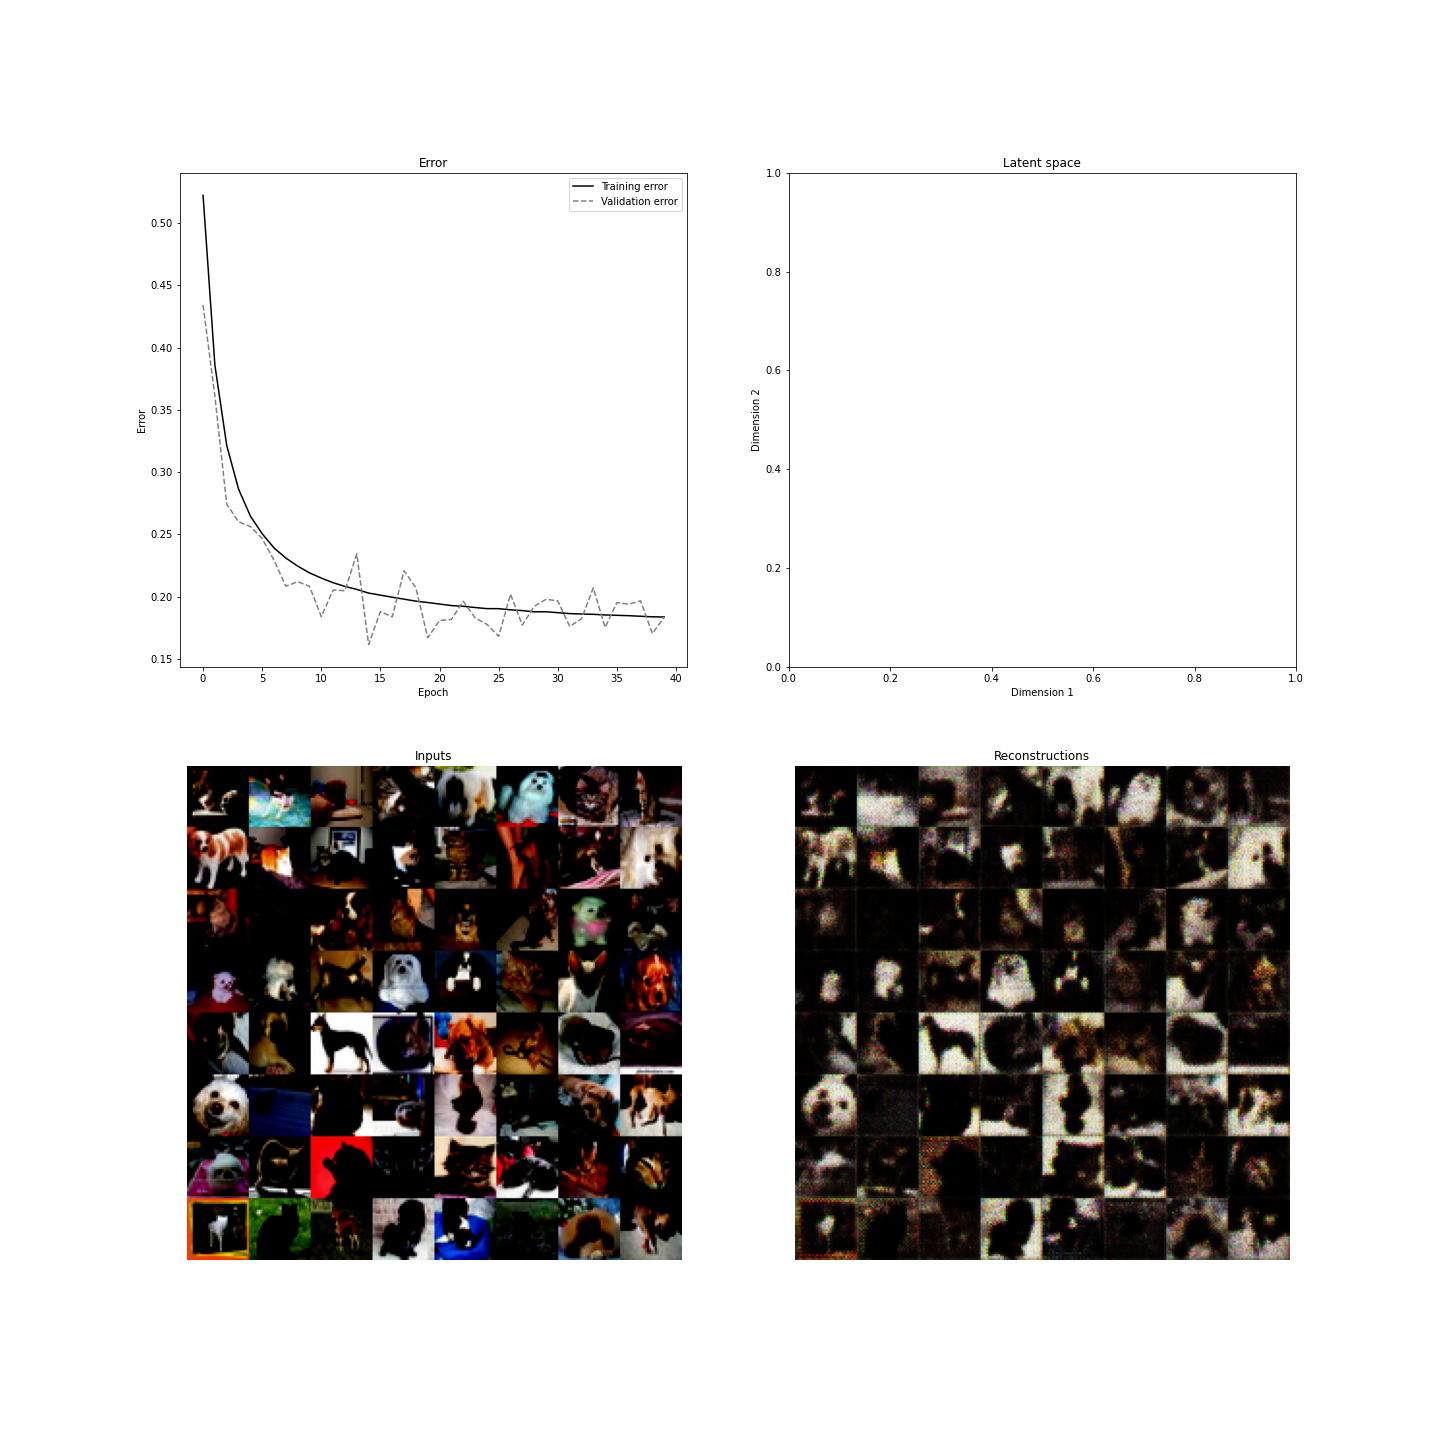

In [11]:
plot_autoencoder_stats(x=x.view(batch_size, width*height*channels),
                        x_hat=x_hat.view(batch_size, width*height*channels),
                        z=z,
                        y=y,
                        train_loss=train_loss,
                        valid_loss=valid_loss,
                        epoch=epoch,
                        classes=classes,
                        dimensionality_reduction_op=None) 

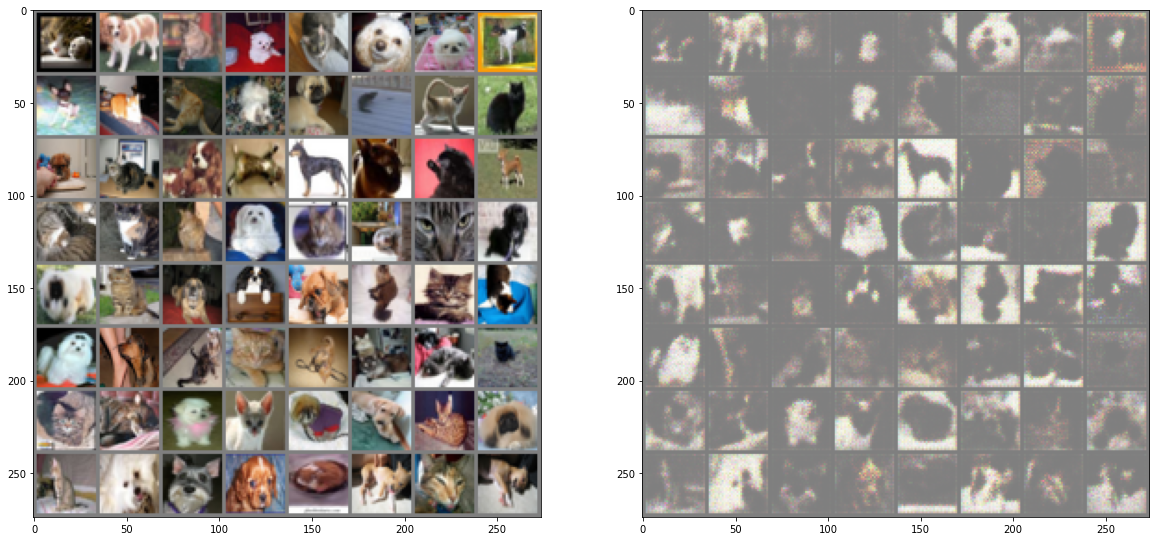

In [12]:
x_hat = x_hat.cpu()
#x_hat_r = x_hat[:, 0:1024].view(batch_size, width, height)
#x_hat_g = x_hat[:, 1024:2048].view(batch_size, width, height)
#x_hat_b = x_hat[:, 2048:3072].view(batch_size, width, height)
#x_hat_rgb = torch.stack((x_hat_r, x_hat_g, x_hat_b), dim=1)

def unnormalize_image(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

f, axarr = plt.subplots(1, 2, figsize=(20, 20))

ax = axarr[0]
x_grid = torchvision.utils.make_grid(x.cpu())
ax.imshow(unnormalize_image(x_grid))

ax = axarr[1]
x_hat_grid = torchvision.utils.make_grid(x_hat)
#x_hat_grid = torchvision.utils.make_grid(x_hat_rgb)
ax.imshow(unnormalize_image(x_hat_grid))

#imshow(torchvision.utils.make_grid(x.cpu()))


plt.show()